# Python實作_決策樹

In [61]:
from sklearn import tree
from sklearn import datasets
import pydotplus
from graphviz import Digraph
import numpy as np
from matplotlib import pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [62]:
#把feature放進x裡面
#把target放進y裡面
X = iris.data
y = iris.target

In [63]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)#把資料fit進去

In [65]:
clf.score(X,y)

1.0

決策數模型輸出

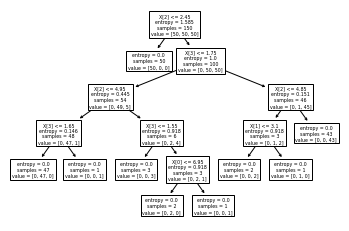

In [66]:
tree.plot_tree(clf)
plt.show()

In [32]:
import os
 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

dot_data = tree.export_graphviz(clf,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')

True

Q&A    
entropy代表information gain. 如果您在criterion將entropy改成gini，那麼輸出pdf後看到的就會變成gini值了。    
2.X[2]<=2.45，所代表的就是第1個特徵的值(因為python從0開始算，所以2代表第一個) <=2.45的話，就會被分到左邊(True)那邊。     
samples代表到了這個階段，裏頭有機個樣本。而values代表的意思則是這些樣本分別有多少是屬於哪種類型。 比方說，假設某個格子裡顯示samples=100, values=[0,40,60]，那就代表著到了這個階段，總共有100個樣本在這個階段，其中0個屬於第一種鳶尾花，40個屬於第二種鳶尾花，60個屬於第三種鳶尾花。   

拆分訓練集與測試集

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train ,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [37]:
clf =tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [43]:
clf.score(X_train,y_train)#overfitting

1.0

In [40]:
clf.predict(X_test)

array([1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1])

In [42]:
clf.score(X_test,y_test)

0.9333333333333333

過度配飾初步調整

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(X_train,y_train)
#限制樹的feature 只限制3種

In [46]:
clf.predict(X_test)#預測

array([1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1])

In [47]:
clf.score(X_train,y_train)#預測vs真實

0.9809523809523809

In [49]:
clf.score(X_test,y_test)

0.9555555555555556

In [50]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3).fit(X_train,y_train)

pdf檔案解析  
X[3]裡面的數字表示第幾個feature   
X[3] <= 1.75 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html   

In [51]:
clf.predict(X_test)

array([1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1])

In [52]:
clf.score(X_train,y_train)

0.9809523809523809

In [53]:
clf.score(X_test,y_test)

0.9555555555555556

In [54]:
import os
 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

dot_data = tree.export_graphviz(clf,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_gini_max3.pdf')  

True

gini and entropy  
是模型中用來定義最好分支的"指標"，這兩種方法算是最常見的。當然還是可以用其他方法來決定  分支，甚至要自己定義也行。不過目前我們用的sklearn模組裡面僅支援這兩種方法。      
附上官網連結供參考:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html   

典型的決策樹算法
ID3 算法

ID3 是最早提出的決策樹算法，他就是利用信息增益來選擇特徵的。

C4.5 算法

他是 ID3 的改進版，他不是直接使用信息增益，而是引入“信息增益比”指標作爲特徵的選擇依據。

CART （Classification and Regression Tree）

這種算法即可以用於分類，也可以用於迴歸問題。CART 算法使用了基尼係數取代了信息熵模型。

決策樹的優缺點  
優點

決策樹易於理解和解釋，可以可視化分析，容易提取出規則；  
可以同時處理標稱型和數值型數據；    
比較適合處理有缺失屬性的樣本；   
能夠處理不相關的特徵；   
測試數據集時，運行速度比較快；    
在相對短的時間內能夠對大型數據源做出可行且效果良好的結果。    

缺點

容易發生過擬合（隨機森林可以很大程度上減少過擬合）；  
容易忽略數據集中屬性的相互關聯；   
對於那些各類別樣本數量不一致的數據，在決策樹中，進行屬性劃分時，不同的判定準則會帶來不  同的屬性選擇傾向；信息增益準則對可取數目較多的屬性有所偏好（典型代表 ID3 算法），而增益  率準則（CART）則對可取數目較少的屬性有所偏好，但 CART 進行屬性劃分時候不再簡單地直接 利用增益率盡心劃分，而是採用一種啓發式規則）（只要是使用了信息增益，都有這個缺點，如 RF）。    
ID3 算法計算信息增益時結果偏向數值比較多的特徵。     




# Python實作_隨機森林

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
iris = datasets.load_iris()

In [70]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
X = iris.data
y = iris.target

In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [179]:
rfc=RandomForestClassifier(n_estimators=5,random_state=5)#隨機種子不固定會不知道是我們做出改變預測提高還是隨機性
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=5)

In [190]:
rfc=RandomForestClassifier(n_estimators=1000,n_jobs = -1,random_state =50, min_samples_leaf = 5)#n_jobs電腦核心處理增加效率
rfc.fit(X_train,y_train)  #min_samples_leaf樹枝修剪解決overfitting

RandomForestClassifier(min_samples_leaf=5, n_estimators=1000, n_jobs=-1,
                       random_state=50)

In [191]:
y_predict = rfc.predict(X_test)
y_predict

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       1])

In [192]:
rfc.score(X_test,y_test)#隨機種子要固定

0.9555555555555556

# Feature Importance

In [194]:
#4個feature中到底哪個比較重要
imp = rfc.feature_importances_

In [196]:
imp

array([0.09509461, 0.01284381, 0.39147883, 0.50058274])

In [232]:
names = iris.feature_names
names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

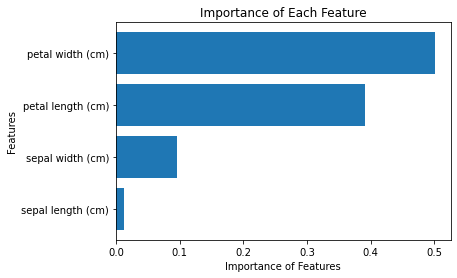

In [227]:
zip(imp,names)         #視覺化呈現
imp, names= zip(*sorted(zip(imp,names))) #有zip外層,才可以賦予兩個變數,sorted 是list的methid所以會回傳list
plt.barh(range(len(names)),imp,align='center') #align='center'tick在bar的邊緣還是中心
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()

Day18 - 當我們「鏈」在一起，認識zip()函數   

https://ithelp.ithome.com.tw/articles/10218029  

# 迴歸模型(Regression)

Python datasets.make_regression方法代碼示例   
https://vimsky.com/zh-tw/examples/detail/python-method-sklearn.datasets.make_regression.html

In [266]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from sklearn import linear_model #線性模組
from sklearn.preprocessing import PolynomialFeatures #多項式回歸
from sklearn.pipeline import make_pipeline#多項式回歸
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [267]:
X,y = make_regression(n_samples=100,n_features=1,noise=20) #n_targets >>>label

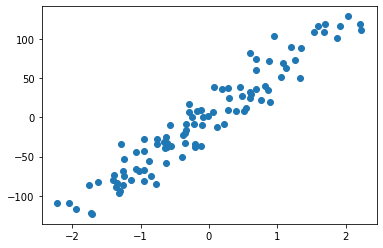

In [268]:
plt.scatter(X,y)

In [270]:
#資料集分類避免overfitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Simple Linear Regression

In [278]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

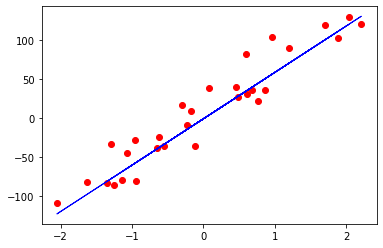

In [283]:
#plt.scatter(X_train, y_train, color='black')#訓練集資料分佈狀況
plt.scatter(X_test, y_test, color='red')#測試集資料分佈狀況
#plt.scatter(X_test, regr.predict(X_test), color='blue')#預測出的點
plt.plot(X_test, regr.predict(X_test),color='blue',linewidth=1)#簡單線性回歸
plt.show()

In [288]:
w_0 = regr.intercept_#叫出截距項
w_1 = regr.coef_#叫出係數

In [289]:
print("Intercept: ",w_0)
print("Cofficient: ",w_1)

Intercept:  -1.0086899583511002
Cofficient:  [59.48239079]


In [292]:
regr.score(X_train,y_train)

0.9295069540422787

In [294]:
regr.score(X_test,y_test)

0.8952993627473742

# Gradient Decent  


In [298]:
#Parameters
alpha = 0.001 #learning rate
repeats = 1000 #epoch 運行次數,學習幾次 增加越多次越接近sklearn結果
#Initializing variabeles
w0 = 0 #截距項
w1 = 1 #係數項
errors = []
points = []

In [299]:
for j in range(repeats):
    error_sum=0
    squared_error_sum=0
    error_sum_x=0
    for i in range(len(X_train)):
        predict=w0+(X_train[i]*w1)
        squared_error_sum=squared_error_sum+(y_train[i]-predict)**2
        error_sum=error_sum+y_train[i]-predict
        error_sum_x=error_sum_x+(y_train[i]-predict)*X_train[i]
    w0=w0+(alpha*error_sum)
    w1=w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))

print('w0: %2f' %w0)
print('w1: %2f' %w1)

w0: -1.008690
w1: 59.482391


In [300]:
predicts=[]
mean_error=0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)

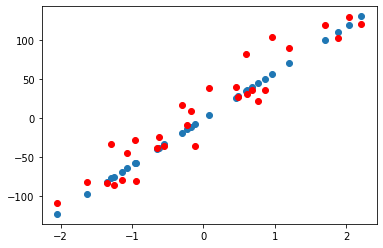

In [302]:
plt.scatter(X_test,predicts)
plt.scatter(X_test, y_test, color='red')
plt.show()

# Polynomial Regression

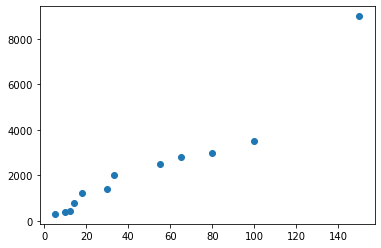

In [304]:
#未區分資料全部為訓練集  #預測房價
size=[5,10,12,14,18,30,33,55,65,80,100,150]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(size,price)
plt.show() #觀察出此數據分佈非線性因此會想採用多項式回歸處理

In [319]:
series_dict = {'X':size,'y':price}  #資料整理
df = pd.DataFrame(series_dict)
X = df[['X']]
y = df[['y']] 

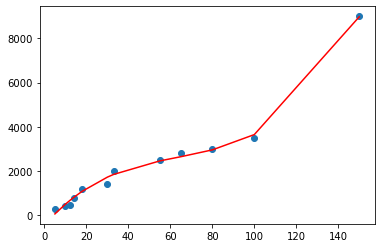

In [320]:
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())#PolynomialFeaturesg數字為次方數
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')

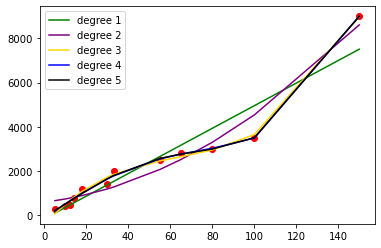

In [321]:
#寫出看哪一個次方比較fit資料
scores=[]
colors=['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count,degree in enumerate([1,2,3,4,5]):
    model=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color=colors[count],label='degree %d' %degree)

plt.legend(loc=2)
plt.show()

enumerate() 函数   
https://www.runoob.com/python/python-func-enumerate.html

In [330]:
scores#三次就很足夠了

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695324]

# Multivariable Regression

In [369]:
X,y = make_regression(n_samples=100,n_features=5,noise=20)#n_feature 做出更多特徵

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [371]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [372]:
regr.intercept_ #截距

-4.620711912536418

In [373]:
regr.coef_#5個係數

array([54.39095525, 37.43996153, 76.76554201, 75.16929122, 35.97795717])

In [374]:
regr.score(X_train,y_train)

0.9818564198723393

In [375]:
regr.score(X_test,y_test)

0.9715380770869434

In [376]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
distance=[50,20,70,100,200,150,30,50,70,35,40,20]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000] #feature增加為2個

In [377]:
series_dict = {'X1':size,'X2':distance,'y':distance}
df = pd.DataFrame(series_dict)
X = df[['X1','X2']]
y = df[['y']]   #df[] 中放進 []list 可以讓只有一有一行的series變成 dataframe

In [378]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [379]:
regr.score(X,y)

1.0

In [380]:
regr.intercept_

array([0.])

In [383]:
regr.coef_  #size 的係數較高好像比distance更適合做為feature

array([[8.45996021e-17, 1.00000000e+00]])

To Avoid Overfitting
1. Lasso Regression #懲罰項
2. Ridge Regression 

In [384]:
X,y=make_regression(n_samples=1000, n_features=10, noise=10)

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [386]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [387]:
print('Training Score: ',regr.score(X_train,y_train))
print('Testing Score: ',regr.score(X_test,y_test))

Training Score:  0.9952808719804709
Testing Score:  0.994325754004257


In [417]:
clf_lasso=linear_model.Lasso(alpha=1)
clf_lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [418]:
print('Training Score: ',clf_lasso.score(X_train,y_train))
print('Testing Score: ',clf_lasso.score(X_test,y_test))

Training Score:  0.994773385817259
Testing Score:  0.9936668627335039


In [411]:
clf_ridge=linear_model.Ridge(alpha=50)
clf_ridge.fit(X_train,y_train)

Ridge(alpha=50)

In [412]:
print('Training Score: ',clf_ridge.score(X_train,y_train))
print('Testing Score: ',clf_ridge.score(X_test,y_test))

Training Score:  0.990687963012749
Testing Score:  0.9891710870700667


In [392]:
model=make_pipeline(PolynomialFeatures(4),linear_model.Ridge())
model.fit(X,y)
model.score(X,y)

0.9996968979161522

# Python實作_邏輯斯迴歸模型

處理資料時，對資料取對數的意義   
https://www.itread01.com/content/1543225745.html

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

平均一天喝幾杯含糖飲料以上未來易得糖尿病?

In [422]:
data=pd.read_csv('C:/Users/user/Desktop/macro programm/PyInvest/LogR_data.csv')

In [425]:
#data

In [429]:
X = data['Amount'].values
y = data['Result'].values

In [430]:
X

array([0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3],
      dtype=int64)

In [437]:
X.shape
X =X.reshape(-1,1) #-1是指請程式配置 
X.shape

(20, 1)

$$logit(Odds)=\ln (\frac{p}{1-p}) = w_0+w_1X$$

In [438]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [439]:
print('coef', model.coef_)
print('intercept',model.intercept_)

coef [[0.83474635]]
intercept [-1.30199159]


In [442]:
w1 = float(model.coef_)
w0 = float(model.intercept_)

$$S(X)=\frac{1}{1+e^{-X}}$$

In [444]:
def sigmoid(x,w0,w1):
    ln_odds = w0+w1*x
    return 1/(1+np.exp(-ln_odds)) # np.exp 是e自然常數取-x的指數函數

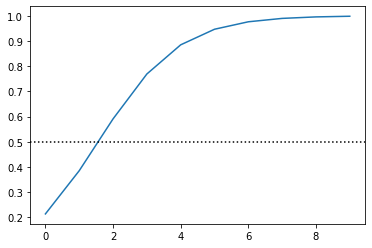

In [446]:
x=np.arange(0,10,1)
s_x=sigmoid(x,w0,w1)
plt.plot(x,s_x)
plt.axhline(y=0.5, ls='dotted', color='k')#平行x軸的水平線

Matplotlib 中繪製水平和垂直線     
https://www.delftstack.com/zh-tw/howto/matplotlib/how-to-plot-horizontal-and-vertical-line-in-matplotlib/

In [455]:
model.predict([[0],[1],[2],[1.55666]])#喝幾杯飲料下[x],會得糖尿病=1 不會=0

array([0, 0, 1, 0], dtype=int64)

In [458]:
#X
model.predict_proba(X)#看出[不會得病的機率,會得病的機率]由此判斷結果為0或1

array([[0.78616997, 0.21383003],
       [0.61473154, 0.38526846],
       [0.23107565, 0.76892435],
       [0.40914498, 0.59085502],
       [0.61473154, 0.38526846],
       [0.61473154, 0.38526846],
       [0.78616997, 0.21383003],
       [0.78616997, 0.21383003],
       [0.61473154, 0.38526846],
       [0.78616997, 0.21383003],
       [0.40914498, 0.59085502],
       [0.23107565, 0.76892435],
       [0.23107565, 0.76892435],
       [0.40914498, 0.59085502],
       [0.40914498, 0.59085502],
       [0.78616997, 0.21383003],
       [0.40914498, 0.59085502],
       [0.23107565, 0.76892435],
       [0.40914498, 0.59085502],
       [0.23107565, 0.76892435]])

In [459]:
model.score(X,y)

0.75

# 多元分類

In [474]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegressionCV

In [475]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [503]:
X=iris.data
y=iris.target

In [504]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [505]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [506]:
model=linear_model.LogisticRegression()

In [507]:
model.fit(X_train,y_train)

LogisticRegression()

In [508]:
model.predict_proba(X_test)

array([[7.27697645e-06, 3.58319483e-02, 9.64160775e-01],
       [1.39589067e-06, 1.90968610e-02, 9.80901743e-01],
       [9.50715116e-01, 4.92846191e-02, 2.64844967e-07],
       [9.70894645e-01, 2.91052979e-02, 5.67528333e-08],
       [1.80598634e-03, 7.86938925e-01, 2.11255088e-01],
       [3.36914823e-06, 4.20592414e-02, 9.57937389e-01],
       [4.24613508e-03, 8.75744703e-01, 1.20009162e-01],
       [9.73662947e-01, 2.63369031e-02, 1.49881761e-07],
       [9.88684306e-01, 1.13156707e-02, 2.32965884e-08],
       [2.40478552e-02, 9.41904985e-01, 3.40471598e-02],
       [6.99945595e-02, 9.20948285e-01, 9.05715505e-03],
       [1.80785164e-03, 4.65248225e-01, 5.32943924e-01],
       [9.80989759e-01, 1.90101596e-02, 8.18161156e-08],
       [9.41027377e-01, 5.89716250e-02, 9.98249328e-07],
       [1.60888948e-04, 1.63540421e-01, 8.36298690e-01],
       [8.14825042e-04, 3.56855209e-01, 6.42329966e-01],
       [2.19251969e-05, 3.82371038e-02, 9.61740971e-01],
       [9.67058152e-01, 3.29417

In [509]:
model.score(X_train,y_train)

0.9809523809523809

In [510]:
model.score(X_test,y_test)

0.9555555555555556

# Python實作_貝氏分類器 Bayesian Classifier

In [512]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [514]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [518]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Gaussian Naive Bayes   
主要用於連續變數，比方說特徵長度為幾公分、重量為幾公斤等等。  
$$ P(X_j|Y_i)=\frac{1}{\sqrt{2\pi\sigma_{Y_i}^2}} exp(-\frac{(X_j-\mu_{Y_i})^2}{2\sigma_{Y_i}^{2}})$$

In [526]:
modelg = GaussianNB()
modelg.fit(X_train,y_train)
modelg.predict(X_test)

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1,
       2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1,
       0])

In [527]:
modelg.predict_log_proba(X_test)#取機率最大值當結果

array([[-6.31877665e+02, -1.51403362e+01, -2.65849343e-07],
       [-5.11615603e+02, -1.53958594e+01, -2.05903279e-07],
       [ 0.00000000e+00, -4.44624711e+01, -5.56171482e+01],
       [ 0.00000000e+00, -4.33418757e+01, -5.59818337e+01],
       [-9.38982225e-12, -2.53913628e+01, -3.91193094e+01],
       [-8.88178420e-16, -3.46001719e+01, -4.84765173e+01],
       [-4.70860679e+02, -6.70986593e+00, -1.21957089e-03],
       [ 0.00000000e+00, -3.99660911e+01, -5.39757459e+01],
       [-5.34822022e+02, -1.55794297e+01, -1.71371923e-07],
       [-3.16646551e+02, -4.35640297e-01, -1.04086340e+00],
       [-2.77196816e+02, -7.08745063e-03, -4.95297121e+00],
       [ 0.00000000e+00, -4.49797462e+01, -5.80964878e+01],
       [-1.91902740e+02, -8.63336365e-05, -9.35733444e+00],
       [-4.09813331e+02, -3.71256678e+00, -2.47177578e-02],
       [ 0.00000000e+00, -4.20054914e+01, -5.49074562e+01],
       [ 0.00000000e+00, -4.71506604e+01, -5.62252741e+01],
       [-3.61258858e+02, -2.68911426e-01

In [528]:
print('Training Set Score:',modelg.score(X_train,y_train))
print('Test Set Score:',modelg.score(X_test,y_test))

Training Set Score: 0.9714285714285714
Test Set Score: 0.9333333333333333


# Multinomial Naive Bayes
主要用在離散變數，比方說次數、類別等等。
$$ P(Y_i)=\frac{N_{Y_i}+\alpha}{N+K_\alpha} $$$$ $$$$P(X_j|Y_i)=\frac{N_{Y_i,x_j}+\alpha}{N_{Y_i}+n\alpha} $$

In [532]:
modelm=MultinomialNB()#α值預設1
modelm.fit(X_train,y_train)
modelm.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1,
       0])

In [533]:
modelm.predict_proba(X_test)

array([[0.00934168, 0.52135702, 0.4693013 ],
       [0.01205513, 0.51263043, 0.47531444],
       [0.75328062, 0.16935861, 0.07736077],
       [0.73294149, 0.18124344, 0.08581507],
       [0.59494486, 0.26630568, 0.13874946],
       [0.64423738, 0.23685452, 0.11890809],
       [0.01590084, 0.52105121, 0.46304795],
       [0.6561101 , 0.22902683, 0.11486308],
       [0.00993877, 0.50179659, 0.48826464],
       [0.04114557, 0.53756326, 0.42129117],
       [0.04648437, 0.53678266, 0.41673298],
       [0.71268285, 0.19305775, 0.0942594 ],
       [0.05426444, 0.52198   , 0.42375556],
       [0.01382446, 0.51022108, 0.47595446],
       [0.69479845, 0.20525023, 0.09995132],
       [0.84092252, 0.11291794, 0.04615953],
       [0.02625212, 0.53164197, 0.44210592],
       [0.00632463, 0.49218131, 0.50149407],
       [0.01919374, 0.52004728, 0.46075898],
       [0.74061781, 0.17725731, 0.08212488],
       [0.04069855, 0.54640626, 0.41289518],
       [0.07221279, 0.53466447, 0.39312275],
       [0.

In [554]:
print('Training Set Score:',modelm.score(X_train,y_train))
print('Test Set Score:',modelm.score(X_test,y_test))

Training Set Score: 0.7333333333333333
Test Set Score: 0.7111111111111111


# Bernoulli Naive Bayes   
用在二元的特徵，比方說特徵是否出現、特徵大小、特徵長短等等這種二元的分類。   
$$ P(X_j|Y_i)=P_{Y_i}^{X_j}(1-P_{Y_i})^{X_j} $$

In [556]:
modelb = BernoulliNB()
modelb.fit(X_train,y_train)
modelb.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [557]:
modelb = BernoulliNB(binarize=1)#設定門檻為1
modelb.fit(X_train,y_train)
modelb.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0])

In [539]:
modelb.score(X_test,y_test)#花瓣花萼長度用binarize=1,並不適合

0.5777777777777777

In [558]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [559]:
modelb = BernoulliNB(binarize=[5.84,3.05,3.76,1.2])#可以嘗試用標準差當門檻去切
modelb.fit(X_train,y_train)
modelb.predict(X_test)

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2,
       0])

In [560]:
model.predict_log_proba(X_test)

array([[-6.31877665e+02, -1.51403362e+01, -2.65849343e-07],
       [-5.11615603e+02, -1.53958594e+01, -2.05903279e-07],
       [ 0.00000000e+00, -4.44624711e+01, -5.56171482e+01],
       [ 0.00000000e+00, -4.33418757e+01, -5.59818337e+01],
       [-9.38982225e-12, -2.53913628e+01, -3.91193094e+01],
       [-8.88178420e-16, -3.46001719e+01, -4.84765173e+01],
       [-4.70860679e+02, -6.70986593e+00, -1.21957089e-03],
       [ 0.00000000e+00, -3.99660911e+01, -5.39757459e+01],
       [-5.34822022e+02, -1.55794297e+01, -1.71371923e-07],
       [-3.16646551e+02, -4.35640297e-01, -1.04086340e+00],
       [-2.77196816e+02, -7.08745063e-03, -4.95297121e+00],
       [ 0.00000000e+00, -4.49797462e+01, -5.80964878e+01],
       [-1.91902740e+02, -8.63336365e-05, -9.35733444e+00],
       [-4.09813331e+02, -3.71256678e+00, -2.47177578e-02],
       [ 0.00000000e+00, -4.20054914e+01, -5.49074562e+01],
       [ 0.00000000e+00, -4.71506604e+01, -5.62252741e+01],
       [-3.61258858e+02, -2.68911426e-01

In [561]:
print('Training Set Score:',modelb.score(X_train,y_train))
print('Test Set Score:',modelb.score(X_test,y_test))

Training Set Score: 0.7619047619047619
Test Set Score: 0.7555555555555555


# Python實作_支援向量機 SVM

In [634]:
import numpy as mp 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import svm

In [654]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
feature_names = iris.feature_names

In [650]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [572]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [652]:
target_names = iris.target_names
labels = target_names[target] #把鳶尾花的label標示出來(0,1,2)>>>名稱


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [571]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [611]:
setosa_petal_length=features[labels=='setosa',2] #
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width] #把兩個特徵合成array
versicolor_petal_length=features[labels=='versicolor',2]#np.c_>>>指columns
versicolor_petal_width=features[labels=='versicolor',3]
versicolor = np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica = np.c_[virginica_petal_length,virginica_petal_width]

In [656]:
# setosa

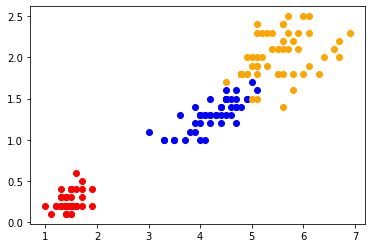

In [614]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='orange')#x:花瓣長度,y花瓣寬度

In [660]:
#把data處理一下
training_data = np.r_[setosa,versicolor,virginica]
training_labels = np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),
                     np.ones(len(virginica))*2] #為啥不用target就好

In [641]:
#SVM建模
clf=svm.LinearSVC()  
clf.fit(training_data,train_labels)

LinearSVC()

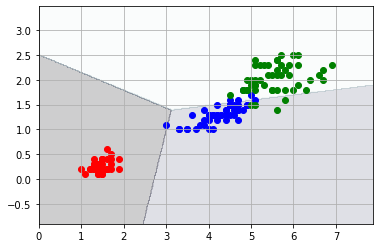

In [657]:
#畫圖目標是讓上面scatter圖白色沒有樣本的地方也能被預測到
training_x_min=training_data[:,0].min()-1 #找x,y的最大最小值,設定邊界
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02 #畫出網格設定為0.2切割
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])#去預測
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)#contourf畫出等高線圖
plt.autoscale()
plt.grid()
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.show()

# Method學習
np.meshgrid    
plt.contourf    
plt.autoscale()   

# 重要參數
C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。   
gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')   
kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等    

In [663]:
#做畫圖函數
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(setosa[:,0],setosa[:,1],color='red')
    plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
    plt.scatter(virginica[:,0],virginica[:,1],color='green')
    plt.title(title)
    plt.show()

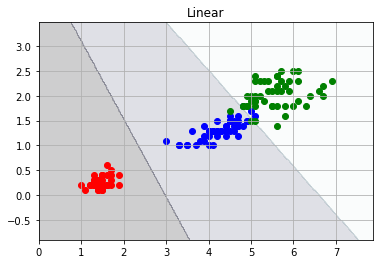

In [664]:
clf=svm.SVC(kernel='linear') #可以替換kernel觀察輸出結果 和clf=svm.LinearSVC() 不同是因為演算法不同  >>>svm.LinearSV速度快
clf.fit(training_data,training_labels)
SVM_plot(clf,'Linear')

# 換特徵

In [666]:
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

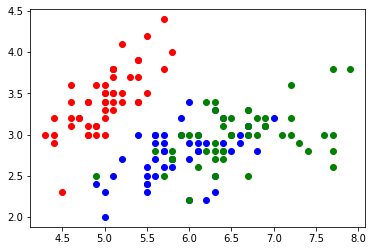

In [667]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [668]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

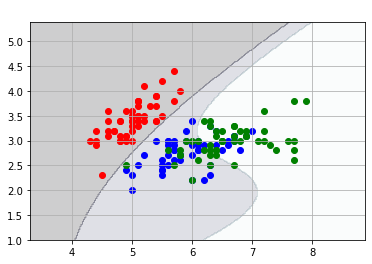

In [673]:
clf=svm.SVC(kernel='poly',C=1000)   #degree預設3  #C是使樣本分類越精確  
clf.fit(training_data,training_labels)  #怎麼調參數可以自己想
SVM_plot(clf,' ')

# 整體流程

# Step1. 下載資料

In [683]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

Step2. 區分訓練集與測試集

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

Step3. 建模

In [685]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)#調參阿@@
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

當時參數C採用預設，預設值為1，   
C為懲罰係數。   
C愈大代表錯誤的容忍程度愈低，     
在訓練集樣本中會區分的愈精細，因此設定太大容易造成過度擬和的問題。   
反之，設定太小則會造成低度擬合的問題。    


Step4. 預測

In [686]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])


Step5. 準確度分析

In [688]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777


# Python實作_K-近鄰演算法 KNN

In [709]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np


Step1. 下載資料

In [710]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

Step2. 區分訓練集與測試集

In [711]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1) #其他方法 random_state固定隨機種子

Step3. 建模
n_neighbors : K   
weights: 'uniform' / 'distance' / 其他   
algorithm: 'auto' / 'brute'每一個點都會計算一次 / 'kd_tree'依照訓練資料維度找最近距離計算距離 / 'ball_tree'  中心點與半徑決定是否計算    
p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離  

In [717]:
clf=KNeighborsClassifier(n_neighbors=100,p=2,weights='distance',algorithm='brute')  #n_neighbors >>>>>k值
#weights 採用distance可以使投票時越接近某數字判定為某分類
#解決樣本為奇數,無法判別的問題
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=100, weights='distance')

Step4. 預測

In [718]:

clf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

Step5. 準確程度評估

In [719]:
clf.score(X_test,y_test)

0.9777777777777777

In [720]:
clf.score(X_train,y_train)

1.0


Step6. 尋找合適的K

In [721]:
len(X_train)#希望為樣本數平方根>>>K 10~11之間

105

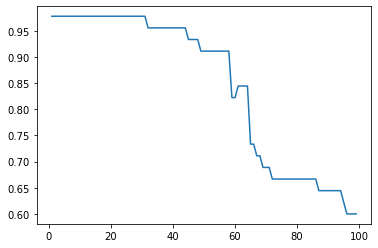

In [723]:
accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,100)
plt.plot(k_range, accuracy)
plt.show()

#ps:可以自己拿資料實測看看,實驗中的樣本很小